<a href="https://www.panosc.eu/">
<img src="https://www.eosc-portal.eu/sites/default/files/PANOSC_0.jpg" width="450" heigth="450"></a>

| Author | Affiliation |
| ---- | ---- | 
| [Giuseppe La Rocca](mailto:giuseppe.larocca@egi.eu) | EGI Foundation | 
| [Enol Fernández](mailto:enol.fernandez@egi.eu) | EGI Foundation | 
| [Marco De Simone](mailto:marco.desimone@ceric-eric.eu) | CERIC-ERIC |
| [Michal Orzechowski](mailto:michal.orzechowski@cyfronet.pl) | CYFRONET |
| [Łukasz Opioła](mailto:lukasz.opiola@gmail.com) | CYFRONET |
| [Bartosz Kryza](mailto:bkryza@agh.edu.pl) | CYFRONET |
| [Miroslav Ruda](mailto:ruda@ics.muni.cz) | CESNET-MCC |
| [Andrei Kirushchanka](mailto:andrei.kirushchanka@cesnet.cz) | CESNET-MCC |
| [Christos Kanellopoulos](mailto:christos.kanellopoulos@geant.org) | GEANT |

| Created | Last updated | License
| ---- | ---- | ---- |
| 01 April 2020 | 09 April 2020 | Apache v2.0

---
### About this notebook

- This notebook is used to demonstrate how a scientist from one of the <a href="https://www.panosc.eu/">PaNOSC</a> RIs can use the resources provided by <a href="https://www.egi.eu/">EGI</a> to perform analysis on the data sets obtained during an expirement.
- The PaNOSC RI involved in this data transfer pilot is <a href="https://www.ceric-eric.eu/">CERIC-ERIC</a> from Trieste. For this pilot use case CERIC-ERIC provided access to <a href="https://support.hdfgroup.org/HDF5/doc/H5.intro.html">hdf5</a> data sets.
- <a href="https://www.cesnet.cz/">CESNET-MCC</a> is the cloud provider of the EGI Federation supporting this pilot use case with computing and storage resources. 
- To federate the hdf5 data sets, and enable data replication across different RI providers, the <a href="https://onedata.org/">Onedata</a> software stack will be used.
- The <a href="https://www.egi.eu/services/notebooks/">EGI Notebooks</a> service, based on <a href="https://jupyter.org/hub">JupyterHub</a> technology, is used as agile environment to access and process data sets.
- Federated credentials released by <a href="https://umbrellaid.org/">UmbrellaID</a> are used to access the services and resources of this pilot.
- To read and analyse hdf5 data sets we used the <a href="https://github.com/European-XFEL/h5glance">H5Glance</a> library developed</br> by the <a href="https://www.xfel.eu/">European-XFEL</a> and the <a href="https://www.h5py.org/">h5py</a> Python library.

---
### High-level architecture of the PaNOSC Data Transfer Pilot

![title](imgs/Architecture.png)

## Install additional libraries

Libraries can also be installed from a Linux terminal

In [8]:
%pip install h5glance

Note: you may need to restart the kernel to use updated packages.


## Import the necessary libraries

In [3]:
import h5py
from h5glance import H5Glance

# Import auxiliary libraries
import os, io
import requests
import matplotlib.pyplot as plt
from PIL import Image 
import os.path
from os import path

# Import additional Onedata library
from fs.onedatafs import OnedataFS

## Get the .h5 datasets location in the shared volume space

In [4]:
folder_name="marco.desimone/samples/twinmic/"
#folder_name="marco.desimone/samples/"

# Listing all volume space 
headers = {'X-Auth-Token': os.environ['ONECLIENT_ACCESS_TOKEN']}
url = "https://%s/api/v3/oneprovider/spaces/" %os.environ['ONEPROVIDER_HOST']
r = requests.get(url=url, headers=headers)
print("Response from: %s" %os.environ['ONEPROVIDER_HOST'])
print(r.json())

spaceId = r.json()[0]['spaceId']
space_name = r.json()[0]['name']
print("\nSpaceID = %s" %spaceId)
print("Space Name = %s" %space_name)

# Create the path in OZ where the .h5 datasets is stored
OZ_path = os.path.join('/', space_name, folder_name)
print("\nDatasets is available at: %s" % OZ_path)

Response from: oneprovider-pn.onezone-panosc.egi.eu
[{'spaceId': '37b5b4f6a9df5fe38500273755b37996', 'name': 'CERIC-ERIC'}]

SpaceID = 37b5b4f6a9df5fe38500273755b37996
Space Name = CERIC-ERIC

Datasets is available at: /CERIC-ERIC/marco.desimone/samples/twinmic/


## Listing datasets in the volume space 

In [5]:
# Create connection to Oneprovider
odfs = OnedataFS(os.environ['ONEPROVIDER_HOST'],
                 os.environ['ONECLIENT_ACCESS_TOKEN'],
                 force_proxy_io=True)

# Open remote dir
s1 = odfs.opendir(OZ_path)

# List contents from remote dir
s1.listdir('')

['twinmic_scan_41.h5']

## Reading the specific .h5 datasets

In [6]:
#file_name = "simulated.sample3d-2gb-1.h5"
#file_name = "simulated.sample2d-10gb-001.h5"
file_name = "twinmic_scan_41.h5"
h5file_name = os.path.join(OZ_path, file_name)

print("Loading datasets: [%s] from the volume space" %h5file_name)

f = odfs.openbin(h5file_name, mode='r')
os.environ['H5PY_DEFAULT_READONLY'] = '1'
fh5py = h5py.File(f)

H5Glance(fh5py)

Loading datasets: [/CERIC-ERIC/marco.desimone/samples/twinmic/twinmic_scan_41.h5] from the volume space


## Plotting the datasets 

Available keys: <KeysViewHDF5 ['andor', 'dante', 'sample_motors', 'triggers', 'triggers_timestamp']>
- triggers: [   1    2    3 ... 2599 2600 2601]
- timestamp: [1.57496154e+09 1.57496154e+09 1.57496154e+09 ... 1.57496179e+09
 1.57496179e+09 1.57496179e+09]
- sample_stage_x: [26200. 26250. 26300. ... 28600. 28650. 28700.]
- sample_x_pos: [0. 0. 0. ... 0. 0. 0.]
- sample_y_pos: [0. 0. 0. ... 0. 0. 0.]
- sample_stage_y: [25800. 25800. 25800. ... 28300. 28300. 28300.]


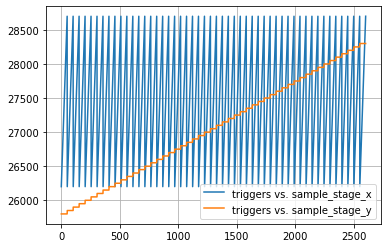

In [7]:
# This code snippet simulates the processing of datasets read from the volume space.
# As result of this simulation, the PNG file will be uplodaded from the notebooks space 
# in the default OneProvider (CESNET-MCC).

print("Available keys: %s" % fh5py.keys())

plt_file="result.png"

if ("triggers" in fh5py.keys()):

    # Getting datasets
    triggers = fh5py['triggers']
    timestamp = fh5py['triggers_timestamp']
    sample_stage_x = fh5py['sample_motors/sample_stage_x']
    sample_x_pos = fh5py['sample_motors/sample_x_pos']
    sample_y_pos = fh5py['sample_motors/sample_y_pos']
    sample_stage_y = fh5py['sample_motors/sample_stage_y']

    print("- triggers: %s" %triggers[:])
    print("- timestamp: %s" %timestamp[:])
    print("- sample_stage_x: %s" %sample_stage_x[:])
    print("- sample_x_pos: %s" %sample_x_pos[:])
    print("- sample_y_pos: %s" %sample_y_pos[:])
    print("- sample_stage_y: %s" %sample_stage_y[:])

    # Define data, grid, legend, and save the plot
    plt.plot(triggers[:], sample_stage_x[:], label='triggers vs. sample_stage_x')
    plt.plot(triggers[:], sample_stage_y[:], label='triggers vs. sample_stage_y')
    plt.grid()
    plt.legend()
    plt.savefig(plt_file, dpi = (100))
else:
    print ("Working in progress..")

#fh5py.close()
#f.close()

## Transferring the result of the simulation 

This code snipped is used as example to:
- Simulate the processing of datasets from the volume space, and 
- Trigger the data transfer in the back-up provider 

In [8]:
if path.exists(plt_file):

    # Define the absolute path in the specific oneprovider
    replica = OZ_path + plt_file

    # Reading local .PNG file
    im = Image.open(plt_file)
    byte_array = io.BytesIO()
    
    # Create the absolute path in the oneprovider and the file
    f1 = odfs.create(replica)
    f1 = odfs.openbin(replica, mode='w+')

    # Store bytes in the volume space of the os.environ['ONEPROVIDER_HOST'] provider
    im.save(byte_array, format='PNG')
    f1.write(byte_array.getvalue())

    # Close remote file
    f1.close()

    # Replicate a file specified by absolute path to a specified provider.
    # This operation is asynchronous and it can take a long time depending 
    # on the size of the data to move.
    # If the path parameter specifies a folder, entire folder is replicated 
    # to requested provider.
    # 
    # API documentation here: 
    # https://onedata.org/#/home/api/stable/oneprovider?anchor=operation/replicate_file

    REPLICA_ONEPROVIDER_HOST="oneprovider-pn-ceric.onezone-panosc.egi.eu"
    headers = {'X-Auth-Token': os.environ['ONECLIENT_ACCESS_TOKEN']}
    url = "https://%s/api/v3/oneprovider/replicas%s" %(REPLICA_ONEPROVIDER_HOST, replica)
    r = requests.get(url=url, headers=headers)
    print(r.json())
    
else:
    print("Nothing to do!")

[{'totalBlocksSize': 65616, 'providerId': '02f4a17f6010dd1d0d9a9705f696b66b', 'blocks': [[0, 65616]]}]
